Following https://www.kaggle.com/dansbecker/explore-your-data

# Import Gender-Science IAT data

In [3]:
import numpy as np
import pandas 
import matplotlib as plt
import seaborn as sns
import scipy
import sklearn

In [4]:
genderiat = pandas.read_csv('gendersciiatdat.csv')

# Descriptives

### Yes, explicit significantly correlates with implicit; keep as a predictor

In [5]:
# print a summary of the data 
genderiat.describe()

,implicit,explicit,raceomb,politics,year,age,education
count,8000.000000,8000.000000,7635.000000,7551.000000,8000.000000,7690.000000,7612.000000
mean,0.342257,4.807500,5.850950,4.704940,2011.599375,27.307802,6.189175
std,0.400191,0.860072,1.343845,1.626299,2.690219,11.650358,2.118038
min,-1.788986,1.000000,1.000000,1.000000,2007.000000,7.000000,1.000000
25%,0.077417,4.000000,6.000000,4.000000,2009.000000,19.000000,5.000000
50%,0.369378,4.500000,6.000000,5.000000,2012.000000,23.000000,6.000000
75%,0.632541,5.500000,6.000000,6.000000,2014.000000,32.000000,8.000000
max,1.518473,7.000000,9.000000,7.000000,2015.000000,80.000000,10.000000


# Data cleaning


In [28]:
# dropna drops missing values
genderiat = genderiat.dropna(axis=0)

# Reset index or some row numbers will be missing from removing NAs
genderiat = genderiat.reset_index(drop = True)

In [7]:
# Select prediction target and call it y
y = genderiat.implicit


In [14]:
# Choose features/predictors and look at a summary of them
X = genderiat[['explicit', 'politics']]
genderiat[['explicit', 'politics']].describe()

,explicit,politics
count,7337.000000,7337.000000
mean,4.815320,4.708464
std,0.860836,1.630016
min,1.000000,1.000000
25%,4.000000,4.000000
50%,4.500000,5.000000
75%,5.500000,6.000000
max,7.000000,7.000000


# Look for reasonable predictors

### Does explicit predict implicit?

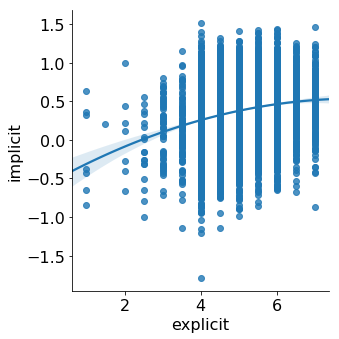

In [69]:
import seaborn
sns.lmplot(x='explicit', y='implicit', order = 2, data = genderiat) # order = 2 allows quadratic

### Yes, explicit significantly correlates with implicit; keep as a predictor

In [66]:
import scipy
r,p = scipy.stats.pearsonr(genderiat['explicit'], genderiat['implicit'])
print(round(r, 2), round(int(p)))

0.22 0


### Does political ideology predict implicit?

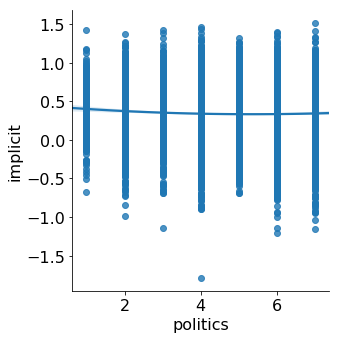

In [68]:
sns.lmplot(x = 'politics', y = 'implicit', order= 2, data = genderiat) 

### Yes, explicit significantly correlates with implicit; keep as a predictor (but note neglibible effect size)

In [70]:
r,p = scipy.stats.pearsonr(genderiat['politics'], genderiat['implicit'])
print(round(r, 2), round(int(p)))

-0.03 0


# Build model: Decision tree

### Using identified predictors: explicit and political ideology

In [18]:
# Run decision tree model
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
genderiat_model = DecisionTreeRegressor(random_state=1)

# Fit model
genderiat_model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [30]:
# Predict first 5 people's implicit scores
print(genderiat_model.predict(X.head()))

# Compart to those 5 people's actual implicit scores
genderiat.implicit.head() 
# Can see that they are nowhere near predicted values!

[0.34387068 0.38112453 0.23418476 0.28684435 0.23418476]


0    1.013018
1    0.438193
2   -0.015030
3    0.425197
4    0.719349
Name: implicit, dtype: float64

## In-sample validation without splitting data


In [31]:
# in-sample mean absolute error between 5 predicted houses and their actual prices

from sklearn.metrics import mean_absolute_error

pred_iat = genderiat_model.predict(X)
mean_absolute_error(y, pred_iat) # where y is the actual iat score and pred is the predicted iat score


0.31243676052631936

## "Out of sample" validation with data split into training and validation sets


In [34]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# Supplying a numeric value to the random_state argument guarantees we get the same split every time we
# run this script.
train_X, train_y, valdtn_X, valdtn_y = train_test_split(X, y, random_state = 0)

In [53]:
# Inspect the training and validation sets to ensure they are as expected
train_X.count() # N = 5502
train_y.count() # N = 5502
valdtn_X.count() # N = 1835
valdtn_y.count() # N = 1835
train_X.describe()

,explicit,politics
count,5502.000000,5502.000000
mean,4.816521,4.709197
std,0.862110,1.627718
min,1.000000,1.000000
25%,4.000000,4.000000
50%,4.500000,5.000000
75%,5.500000,6.000000
max,7.000000,7.000000


In [54]:
# Define model
genderiat_model = DecisionTreeRegressor()

# Fit model using training set predictors and outcomes
genderiat_model.fit(train_X, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [59]:
# get predicted iat scores for validation data
predictions_valdtn = genderiat_model.predict(valdtn_X)

# Inspect array of predictions to make sure values are reasonable
print(predictions_valdtn)
predictions_valdtn.mean()

[0.25614712 0.34193402 0.3149344  ... 0.37656934 0.3004433  0.44857021]


0.34262187284786577

In [60]:
# get mean difference between actual and predicted prices in the validation set
print(mean_absolute_error(valdtn_y, predictions_valdtn))


0.3168604881555546


# Build model: Random forest

In [72]:
from sklearn.ensemble import RandomForestRegressor

# Define model
genderiat_model2 = RandomForestRegressor()

# Fit model using training set predictors and outcomes
genderiat_model2.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [74]:
# get predicted iat scores for validation data
predictions_valdtn2 = genderiat_model2.predict(valdtn_X)

# Inspect array of predictions to make sure values are reasonable
print(predictions_valdtn2)
predictions_valdtn2.mean()

[0.25614712 0.34193402 0.3149344  ... 0.37656934 0.3004433  0.44857021]
[0.26030598 0.3403744  0.32791233 ... 0.3855763  0.31067284 0.43131559]


0.34676829780714574

In [75]:
# get mean difference between actual and predicted prices in the validation set
print(mean_absolute_error(valdtn_y, predictions_valdtn2))

0.31653423794137836
